In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('winequality-white.csv', ";")

C:\Users\vitor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# Analise descritiva

df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


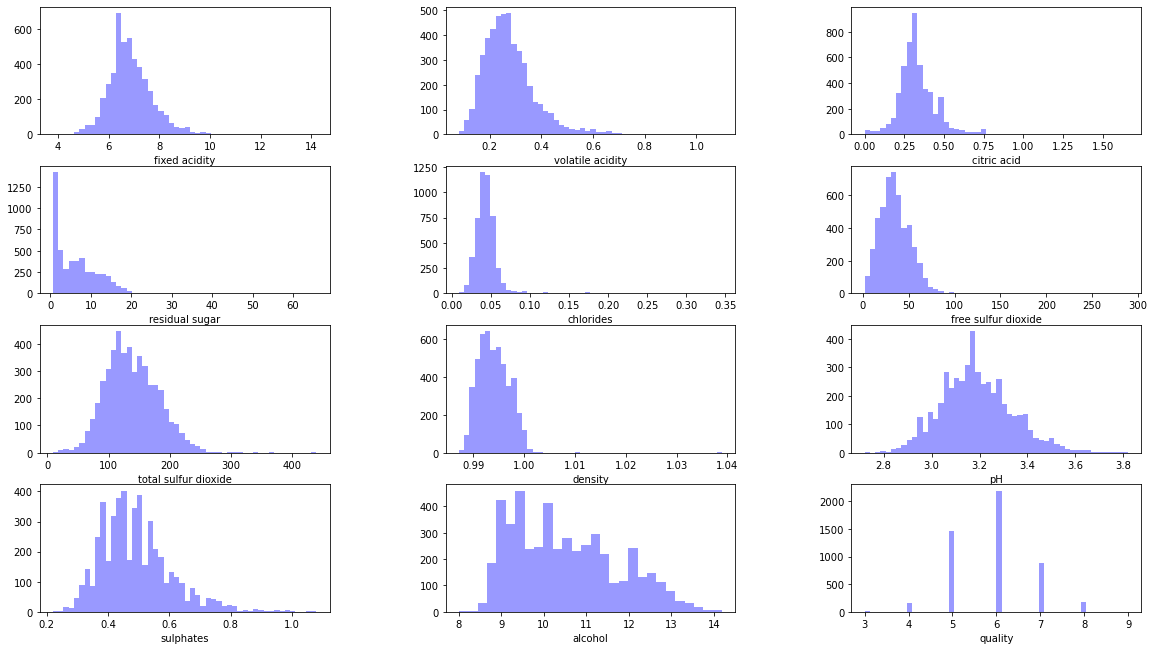

In [6]:
fig,axs=plt.subplots(nrows=4, ncols=3, figsize=(18,10))
for col, ax in zip(df[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.distplot(x, ax=ax, color="blue", kde=False)
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

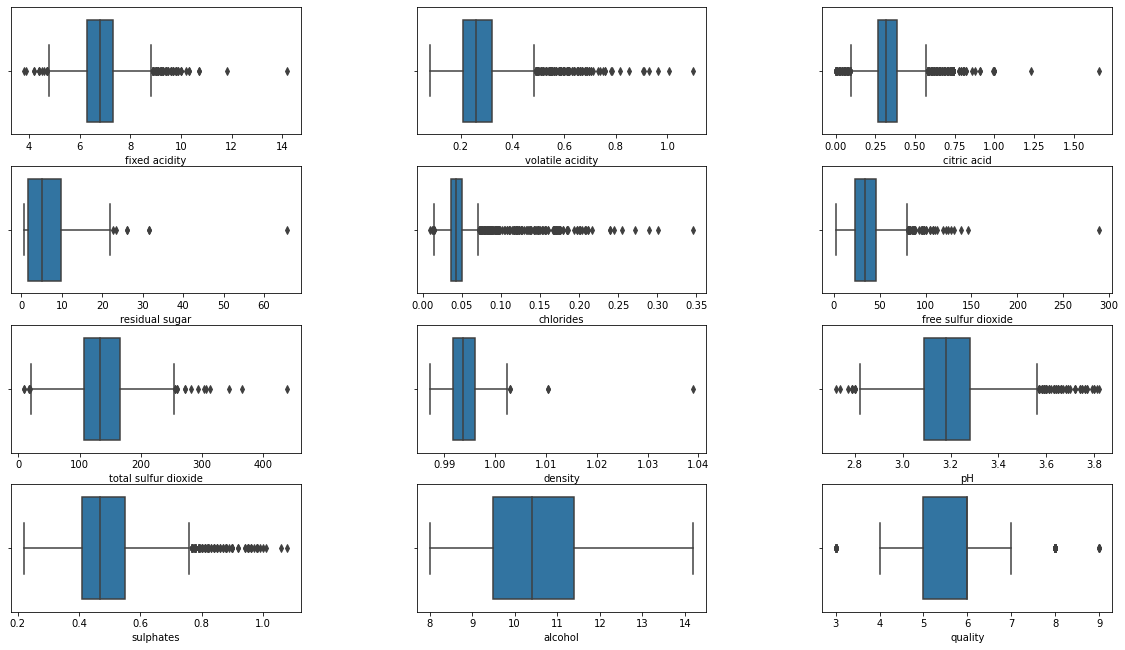

In [7]:
fig,axs=plt.subplots(nrows=4, ncols=3, figsize=(18,10))
for col, ax in zip(df[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.boxplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

<AxesSubplot:>

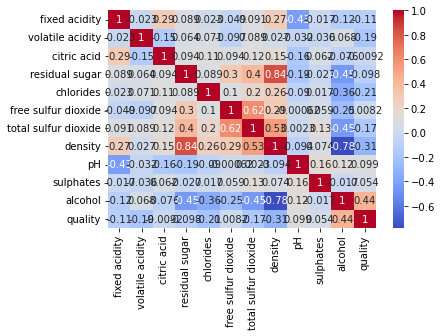

In [8]:
# Correlação

sns.heatmap(df.corr(), cmap='coolwarm', annot = True)

In [9]:
# Removemos do Data Set as columas com correlação ABSOLUTA < 0.2

df_corr = df.corr(method='pearson').abs()

List_Drop = {chave: vlr for chave, vlr in df_corr['quality'].items() if vlr < 0.2 and vlr != 1}

df = df.drop(list(List_Drop), axis=1)

In [10]:
# Removemos os Outliers com base no modelo de amplitude 1.5 x IQR, substituindo pela Mediana

for x in list(df.drop('quality', axis=1)):
    q75, q50, q25 = np.percentile(df.loc[:, x], [75, 50, 25])
    intr_qr = q75 - q25
 
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
 
    df.loc[df[x] < min, x] = q50
    df.loc[df[x] > max, x] = q50

In [11]:
# Selecionar as variáveis preditoras e a resposta

X = df.drop('quality', axis=1)
Y = df['quality']

In [12]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 101)

In [ ]:
#print(len(Y_train), ' - ', len(Y_test))

In [13]:
# Cria o modelo de precição

X_ = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     297.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.01e-172
Time:                        22:12:11   Log-Likelihood:                -4351.5
No. Observations:                3673   AIC:                             8711.
Df Residuals:                    3669   BIC:                             8736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2421      7.741     -2.873      0.0

In [14]:
# Validar amostra de teste

X_t = sm.add_constant(X_test)

Y_train_pred = model.predict(X_)
Y_test_pred  = model.predict(X_t)

In [15]:
# Medidas de erro na amostra treino

me1   = round((Y_train - Y_train_pred).mean(), 2)
mae1  = (mean_absolute_error(Y_train, Y_train_pred)).round(2)
mse1  = (mean_squared_error(Y_train, Y_train_pred)).round(2)
rmse1  = (np.sqrt(mean_squared_error(Y_train, Y_train_pred))).round(2)
mpe1  = round(((Y_train - Y_train_pred) / Y_train).mean(), 2)
mape1  =  round((mae1 / Y_train).mean(), 2) 


# Medidas de erro na amostra teste

me2   = round((Y_test - Y_test_pred).mean(), 2)
mae2  = (mean_absolute_error(Y_test, Y_test_pred)).round(2)
mse2  = (mean_squared_error(Y_test, Y_test_pred)).round(2)
rmse2  = (np.sqrt(mean_squared_error(Y_test, Y_test_pred))).round(2)
mpe2  = round(((Y_test - Y_test_pred) / Y_test).mean(), 2)
mape2  =  round((mae2 / Y_test).mean(), 2)


list_treino = [me1, mae1, mse1, rmse1, mpe1, mape1]
list_teste = [me2, mae2, mse2, rmse2, mpe2, mape2]
list_index = ['me', 'mae', 'mse', 'rmse', 'mpe', 'mape']

pd.DataFrame({"Index":list_index, "treino":list_treino, "teste": list_teste}).set_index('Index')

,treino,teste
Index,,
me,-0.00,-0.02
mae,0.62,0.63
mse,0.63,0.64
rmse,0.79,0.80
mpe,-0.02,-0.02
mape,0.11,0.11


Conclusão: 

Podemos verificar que não houve overfitting ou underfitting, os valores previstos no Treino e Teste mostraram 11% em cada amostra